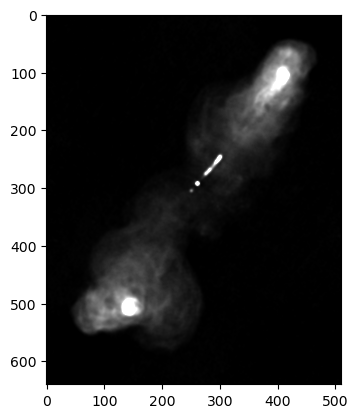

In [8]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# this note book will show an example of how the PH method works.

PATH_RLAGN = '/data/typhon2/Rhys/data/3CR_Sources/3C219'

#open the fits file
hdul = fits.open(PATH_RLAGN)

# get the data
data = hdul[0].data

image = data[0,0,:,:]

plt.imshow(image, cmap='gray',vmin=0.000001, vmax=0.01)
plt.show()

In [9]:
# run ph on this image
import cripser 
import pandas
img = image
pd = cripser.computePH(-img,maxdim=0)
pd = pandas.DataFrame(pd,columns=['dim','Birth','Death','x1','y1','z1','x2','y2','z2'],index=range(1,len(pd)+1))
pd.drop(columns=['dim','z1','z2'],inplace=True)
# remove the infinities
pd['Birth'] = -pd['Birth']
pd['Death'] = -pd['Death']
pd = pd.sort_values('Death',ascending=False)
# remove the last row
pd = pd.iloc[:-1,:]
pd['Lifetime'] = pd['Death'] - pd['Birth']
pd

,Birth,Death,x1,y1,x2,y2,Lifetime
1,0.025663,0.025652,249.0,299.0,248.0,299.0,-1.145527e-05
2,0.024168,0.024127,252.0,297.0,251.0,297.0,-4.091114e-05
3,0.024836,0.023992,250.0,298.0,250.0,299.0,-8.437634e-04
4,0.019262,0.019246,512.0,136.0,512.0,137.0,-1.640990e-05
5,0.018378,0.018266,500.0,137.0,500.0,138.0,-1.117028e-04
...,...,...,...,...,...,...,...
5409,-0.000104,-0.000108,613.0,47.0,613.0,46.0,-3.333960e-06
5410,-0.000107,-0.000108,612.0,49.0,611.0,49.0,-1.695415e-06
5411,-0.000109,-0.000112,0.0,501.0,0.0,502.0,-2.616915e-06
5412,-0.000107,-0.000115,0.0,504.0,1.0,505.0,-7.249793e-06


/tmp/ipykernel_91301/4288471829.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('PH_example.svg',overwrite=True)


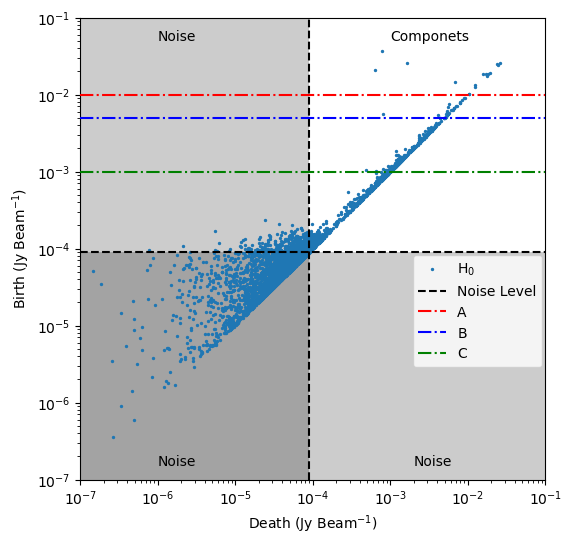

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(pd['Death'],pd['Birth'],s=2,label='H$_{0}$',zorder=40)
plt.xlabel('Death (Jy Beam$^{-1}$)')
plt.ylabel('Birth (Jy Beam$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0000001,0.1)
plt.xlim(0.0000001,0.1) 
Noise = 8.9E-5
plt.axhline(Noise,c='k',ls='--',label='Noise Level',zorder=50)
plt.axvline(Noise,c='k',ls='--',zorder=50)
# put text in the plot
plt.text(0.000001,5E-2,'Noise',rotation=0)
plt.text(0.000001,0.00000015,'Noise',rotation=0)
plt.text(2E-3,0.00000015,'Noise',rotation=0)
plt.text(1E-3,5E-2,'Componets',rotation=0)
# block out a region of the plot
plt.axvspan(1E-7,Noise,facecolor='k',alpha=0.2,zorder=0)
plt.axhspan(0.0000001,Noise,facecolor='k',alpha=0.2,zorder=0)
Acolor='r'
Bcolor='b'
Ccolor='g'
plt.axhline(1E-2,ls='-.',label='A',color=Acolor,zorder=50)
plt.axhline(0.5E-2,ls='-.',label='B',color=Bcolor,zorder=50)
plt.axhline(1E-3,ls='-.',label='C',color=Ccolor,zorder=50)
# set legend postion with bbox_to_anchor
plt.legend(loc='upper left',bbox_to_anchor=(0.7,0.5))
plt.savefig('PH_example.svg',overwrite=True)
plt.show()

/tmp/ipykernel_91301/3387478183.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('PH_example_masks.svg',overwrite=True)


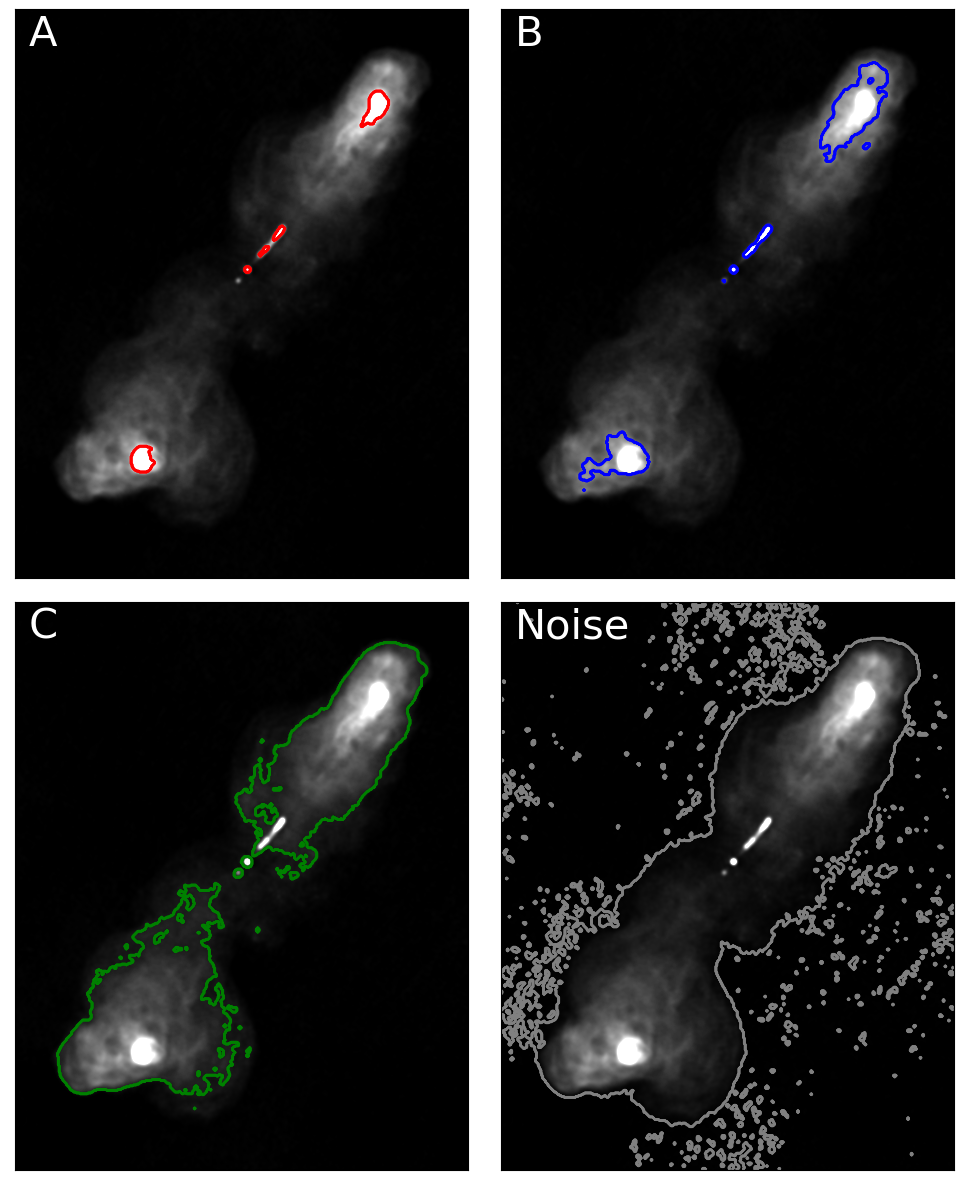

In [11]:
MaskNoise = image > Noise
MaskPeak = image > 1E-2
MaskInter1 = image > 0.5E-2
MaskInter2 = image > 1E-3
vmin=0.000001
vmax=0.01
fig, ax = plt.subplots(2,2,figsize=(10,12))
ax[0,0].imshow(image, cmap='gray',vmin=vmin, vmax=vmax)
# plot the masks as polygons
ax[0,0].contour(MaskPeak,colors=Acolor)
ax[0,0].text(15,40,'A',color='White',fontsize=30)

ax[0,1].imshow(image, cmap='gray',vmin=vmin, vmax=vmax)
ax[0,1].contour(MaskInter1,colors=Bcolor)
ax[0,1].text(15,40,'B',color='White',fontsize=30)

ax[1,0].contour(MaskInter2, colors=Ccolor)
ax[1,0].imshow(image, cmap='gray',vmin=vmin, vmax=vmax)
ax[1,0].text(15,40,'C',color='White',fontsize=30)

ax[1,1].contour(MaskNoise, colors='grey')
ax[1,1].imshow(image, cmap='gray',vmin=vmin, vmax=vmax)
ax[1,1].text(15,40,'Noise',color='White',fontsize=30)
# remove the ticks
for i in range(2):
    for j in range(2):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
plt.tight_layout()
plt.savefig('PH_example_masks.svg',overwrite=True)
plt.show()